In [1]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/Colab Notebooks/offers_new.csv')

df.drop(columns=['max_floor', 'transport_accessibility', 'park', 'reservoirs', 'mall', 'shool', 'hospital', 'kindergarten', 'link'], inplace=True)

categorical_columns = ['finishing ', 'type_of_housing', 'subway', 'parking_space']

categorical_features = df[categorical_columns]
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['finishing ', 'type_of_housing', 'subway', 'parking_space']

In [2]:
df.loc[(df['rooms'] == 'Open layout'), ['rooms']] = '0'

df[["rooms", "price"]] = df[["rooms", "price"]].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sqft                  862 non-null    float64
 1   floor                 862 non-null    int64  
 2   rooms                 862 non-null    int64  
 3   finishing             862 non-null    object 
 4   type_of_housing       862 non-null    object 
 5   subway                862 non-null    object 
 6   time_to_subway        862 non-null    int64  
 7   time_to_park          862 non-null    int64  
 8   time_to school        862 non-null    int64  
 9   time_to_hospital      862 non-null    int64  
 10  time_to_kindergarten  862 non-null    int64  
 11  time_to_bar           862 non-null    int64  
 12  parking_space         862 non-null    object 
 13  price                 862 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 94.4+ KB


In [3]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[unprocessed_cat_features])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=df.index)

df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

one_hot = pd.get_dummies(df['subway'])

df_one_hot = pd.concat([df, one_hot], axis=1)

df_one_hot = df_one_hot.drop('subway', axis=1)
df_one_hot

,sqft,floor,rooms,finishing,type_of_housing,time_to_subway,time_to_park,time_to school,time_to_hospital,time_to_kindergarten,...,шипиловская,шоссе энтузиастов,щёлковская,электрозаводская,юго-восточная,юго-западная,юго-западная,южная,ясенево,яхромская
0,37.9,7,2,нет,новостройка,6,2,3,8,3,...,False,False,False,False,False,False,False,False,False,False
1,129.5,10,4,да,новостройка,12,5,6,15,9,...,False,False,False,False,False,False,False,False,False,False
2,55.9,2,2,да,новостройка,12,5,5,15,9,...,False,False,False,False,False,False,False,False,False,False
3,80.0,5,3,нет,новостройка,6,5,2,15,9,...,False,False,False,False,False,False,False,False,False,False
4,75.3,5,2,да,новостройка,9,10,8,9,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,39.9,17,2,нет,новостройка,2,4,2,12,14,...,False,False,False,True,False,False,False,False,False,False
858,44.3,5,2,да,вторичка,4,15,9,37,34,...,False,False,False,False,True,False,False,False,False,False
859,49.0,1,2,нет,вторичка,12,4,1,39,14,...,False,False,False,False,False,False,False,True,False,False
860,108.9,10,3,да,вторичка,3,3,8,18,41,...,False,False,False,False,False,False,False,False,True,False


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()
label_mapping = {}
for column in unprocessed_cat_features:
  df[column] = label_encoding.fit_transform(df[column])
  label_mapping[column] = dict(zip(label_encoding.classes_, label_encoding.transform(label_encoding.classes_)))

for column, mapping in label_mapping.items():
    print(f"Соответствие для {column}:")
    for category, code in mapping.items():
        print(f"{category}: {code}")

Соответствие для finishing :
да: 0
нет: 1
Соответствие для type_of_housing:
вторичка: 0
новостройка: 1
Соответствие для subway:
авиамоторная : 0
автозаводская: 1
автозаводская : 2
алексеевская: 3
алексеевская : 4
алма-атинская: 5
алтуфьево: 6
аминьевская: 7
аминьевская : 8
аннино: 9
арбатская: 10
арбатская : 11
аэропорт: 12
аэропорт : 13
аэропорт внуково: 14
бабушкинская: 15
багратионовская: 16
баррикадная: 17
бауманская: 18
беговая: 19
беломорская: 20
белорусская: 21
беляево: 22
бибирево: 23
библиотека имени ленина: 24
битцевский парк: 25
борисово: 26
боровицкая: 27
боровское шоссе: 28
ботанический сад: 29
братиславская: 30
бульвар адмирала ушакова: 31
бульвар генерала карбышева: 32
бульвар дмитрия донского: 33
бульвар рокоссовского: 34
бунинская аллея: 35
бутырская: 36
варшавская: 37
вднх: 38
верхние лихоборы: 39
владыкино: 40
водный стадион: 41
войковская: 42
волгоградский проспект: 43
волжская: 44
волоколамская: 45
воробьевы горы: 46
воронцовская: 47
выхино: 48
генерала тюленева: 4

In [5]:
numerical_columns = ['sqft', 'floor', 'rooms',
                     'time_to_subway', 'time_to_park',
                     'time_to school', 'time_to_hospital',
                     'time_to_kindergarten', 'time_to_bar']


In [6]:
num_features = df[numerical_columns]

print("Количество количественных признаков: ", len(num_features.columns))

Количество количественных признаков:  9


In [7]:
num_features

,sqft,floor,rooms,time_to_subway,time_to_park,time_to school,time_to_hospital,time_to_kindergarten,time_to_bar
0,37.9,7,2,6,2,3,8,3,7
1,129.5,10,4,12,5,6,15,9,8
2,55.9,2,2,12,5,5,15,9,8
3,80.0,5,3,6,5,2,15,9,12
4,75.3,5,2,9,10,8,9,3,4
...,...,...,...,...,...,...,...,...,...
857,39.9,17,2,2,4,2,12,14,1
858,44.3,5,2,4,15,9,37,34,8
859,49.0,1,2,12,4,1,39,14,21
860,108.9,10,3,3,3,8,18,41,8


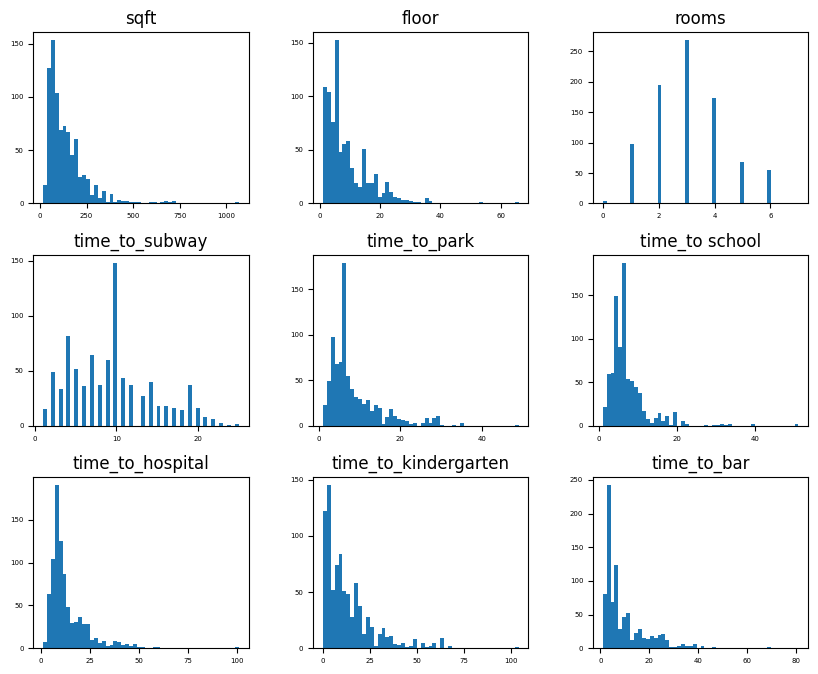

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

num_features.hist(figsize=(10, 8), bins=50, xlabelsize=5, ylabelsize=5, grid=False);

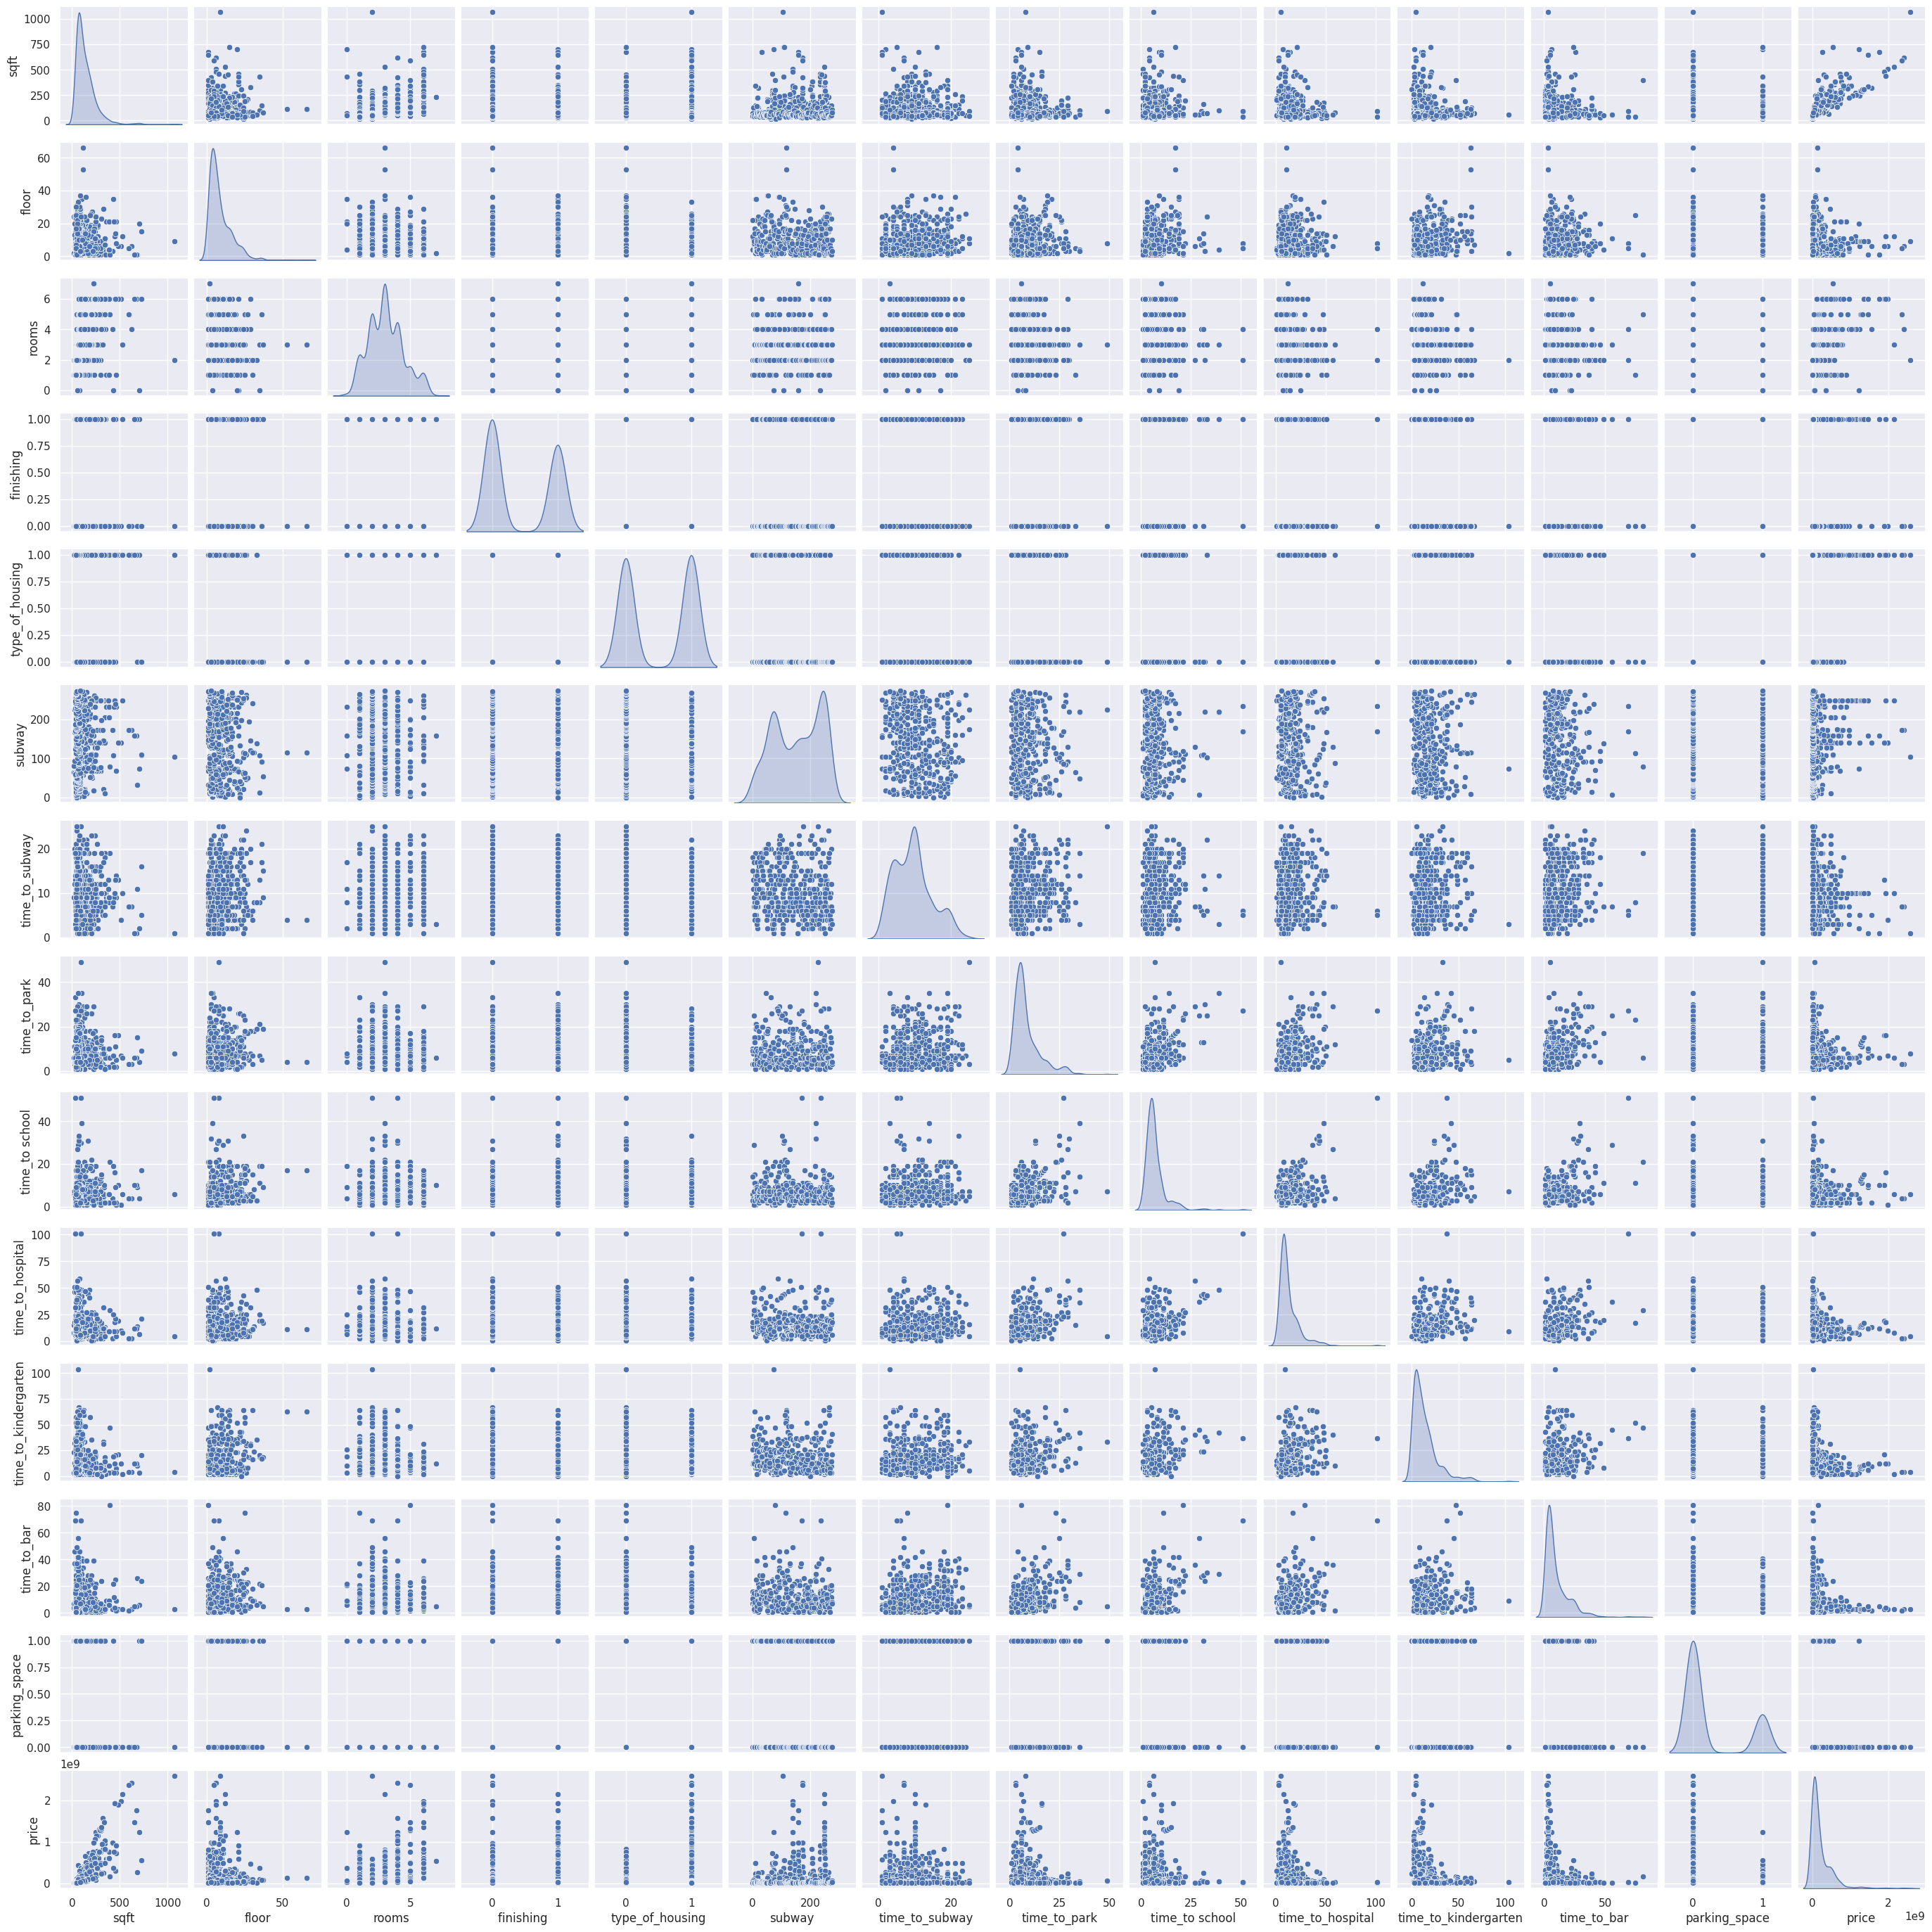

In [9]:
sns.set()
sns.pairplot(df, height = 2, kind ='scatter', diag_kind='kde') # взаимные графики на куче признаков
plt.show()

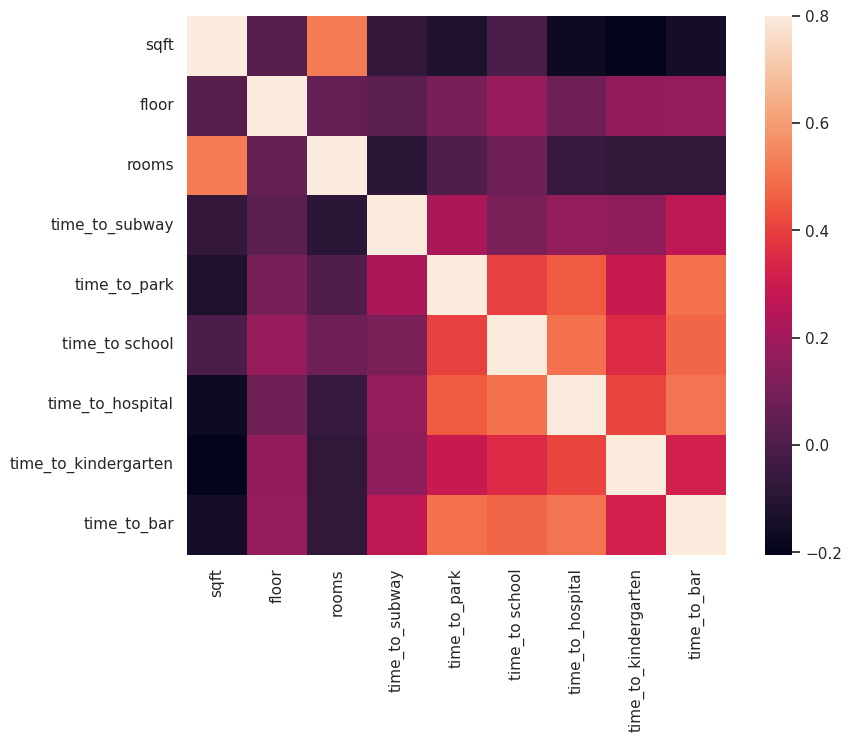

In [10]:
corrmat = num_features.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

In [12]:
X = df.drop(columns=['price']).values
y = df['price'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [15]:
r2_score(y_test, y_pred)

0.7559131435075386

In [16]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
R2_train = r2_score(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
R2_test = r2_score(y_test, pred_test)

print(f'MSE на обучении {MSE_train}')
print(f'MSE на тесте {MSE_test}', end='\n\n')

print(f'R2 на обучении {R2_train}')
print(f'R2 на тесте {R2_test}', end='\n\n')

MSE на обучении 2.7170486728132416e+16
MSE на тесте 2.3864916101174736e+16

R2 на обучении 0.7097500060487361
R2 на тесте 0.7559131435075386



In [17]:
X = df.drop(['price'], axis = 1)
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train_scaled, y_train.values[:, 0])
y_pred = model.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.8503742770828311

In [18]:
X = df.drop(['price'], axis = 1)
print(X)
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)
model.fit(X_train, y_train.values[:, 0])
y_pred = model.predict(X_test)
full_set_err = r2_score(y_test, y_pred)
full_set_err

      sqft  floor  rooms  finishing   type_of_housing  subway  time_to_subway  \
0     37.9      7      2           1                1     151               6   
1    129.5     10      4           0                1     254              12   
2     55.9      2      2           0                1     254              12   
3     80.0      5      3           1                1      53               6   
4     75.3      5      2           0                1      21               9   
..     ...    ...    ...         ...              ...     ...             ...   
857   39.9     17      2           1                1     268               2   
858   44.3      5      2           0                0     269               4   
859   49.0      1      2           1                0     272              12   
860  108.9     10      3           0                0     273               3   
861   82.0      3      3           1                0     274               6   

     time_to_park  time_to 

0.8542246067773246

In [19]:
import pickle
file = open('/content/drive/MyDrive/Colab Notebooks/finalized_model.sav', 'rb')
mf = pickle.load(file)

pred_train = mf.predict(X_train)
pred_test = mf.predict(X_test)


MSE_train = mean_squared_error(y_train, pred_train)
R2_train = r2_score(y_train, pred_train)
#f1_train = f1_score(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
R2_test = r2_score(y_test, pred_test)
#f1_test = f1_score(y_test, pred_test)

print(f'MSE на обучении {MSE_train}')
print(f'MSE на тесте {MSE_test}', end='\n\n')

print(f'R2 на обучении {R2_train}')
print(f'R2 на тесте {R2_test}', end='\n\n')

#print(f'f1 на обучении {f1_train}')
#print(f'f1 на тесте {f1_test}', end='\n\n')

MSE на обучении 3573077148268952.0
MSE на тесте 1.4535352837134854e+16

R2 на обучении 0.9622513327938137
R2 на тесте 0.8475853007335508



In [20]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [21]:
%%time
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_validate, ShuffleSplit

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 21.7 µs


In [22]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(model, df, y,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=2)
cv_results = pd.DataFrame(cv_results)

In [23]:
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]]

In [24]:
max_depth = [1, 5, 10, 15, 20, 25]
train_scores, test_scores = validation_curve(
    model, df, y, param_name="max_depth", param_range=max_depth,
    cv=cv, scoring="neg_mean_absolute_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

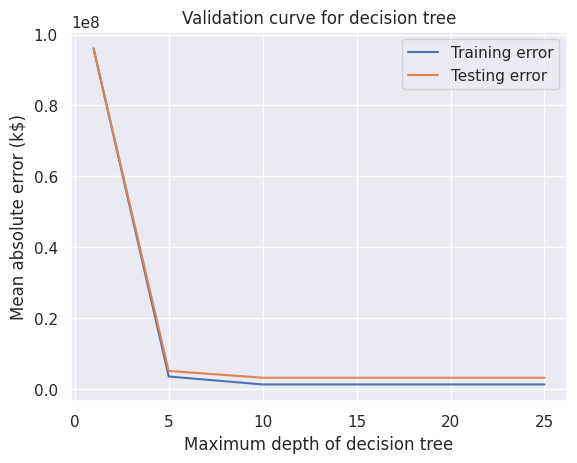

In [25]:
plt.plot(max_depth, train_errors.mean(axis=1), label="Training error")
plt.plot(max_depth, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")